Import Python Libraries (Seaborn, Pandas, Numpy, Matplotlib, Scikit-Learn)

In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

Read into Pandas Dataframe, Rename Columns

In [3]:
country_data = pd.read_csv('covid_19_clean_complete.csv')
country_data.rename({'Country/Region': 'Country_Region'}, axis=1, inplace=True)
country_data.head()

,Province/State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33125 entries, 0 to 33124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  10000 non-null  object 
 1   Country_Region  33125 non-null  object 
 2   Lat             33125 non-null  float64
 3   Long            33125 non-null  float64
 4   Date            33125 non-null  object 
 5   Confirmed       33125 non-null  int64  
 6   Deaths          33125 non-null  int64  
 7   Recovered       33125 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ MB


In [5]:
country_data.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,33125.000000,33125.000000,3.312500e+04,33125.000000,33125.000000
mean,21.181891,22.881195,5.530264e+03,366.236498,1728.502823
std,24.904248,70.245488,4.835556e+04,3315.406205,12244.962870
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,2.600000e+01,0.000000,1.000000
75%,41.153300,78.000000,5.260000e+02,7.000000,109.000000
max,71.706900,178.065000,1.662302e+06,98220.000000,379157.000000


Shows total deaths globally

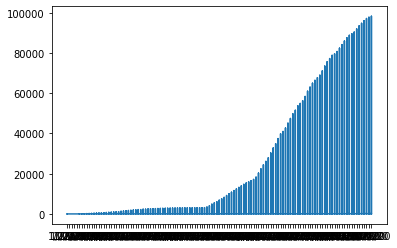

In [7]:
plt.plot(country_data.Date,country_data.Deaths)
plt.show()

Pull United States Data

In [8]:
US = country_data[country_data.Country_Region == 'US']
US

,Province/State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
225,NaN,US,37.0902,-95.7129,1/22/20,1,0,0
490,NaN,US,37.0902,-95.7129,1/23/20,1,0,0
755,NaN,US,37.0902,-95.7129,1/24/20,2,0,0
1020,NaN,US,37.0902,-95.7129,1/25/20,2,0,0
1285,NaN,US,37.0902,-95.7129,1/26/20,5,0,0
...,...,...,...,...,...,...,...,...
32025,NaN,US,37.0902,-95.7129,5/21/20,1577147,94702,298418
32290,NaN,US,37.0902,-95.7129,5/22/20,1600937,95979,350135
32555,NaN,US,37.0902,-95.7129,5/23/20,1622612,97087,361239
32820,NaN,US,37.0902,-95.7129,5/24/20,1643246,97720,366736


In [9]:
thousand = US[US['Deaths']>1000]
thousand

,Province/State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
16655,NaN,US,37.0902,-95.7129,3/24/20,53925,1011,348
16920,NaN,US,37.0902,-95.7129,3/25/20,65844,1320,361
17185,NaN,US,37.0902,-95.7129,3/26/20,83836,1726,681
17450,NaN,US,37.0902,-95.7129,3/27/20,101962,2269,869
17715,NaN,US,37.0902,-95.7129,3/28/20,121786,2744,1072
...,...,...,...,...,...,...,...,...
32025,NaN,US,37.0902,-95.7129,5/21/20,1577147,94702,298418
32290,NaN,US,37.0902,-95.7129,5/22/20,1600937,95979,350135
32555,NaN,US,37.0902,-95.7129,5/23/20,1622612,97087,361239
32820,NaN,US,37.0902,-95.7129,5/24/20,1643246,97720,366736


Plot United States Data

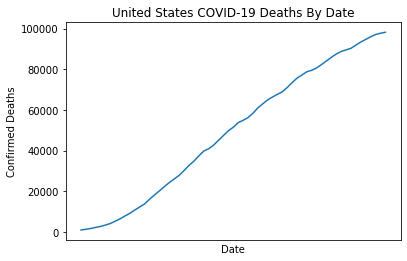

<Figure size 72x288 with 0 Axes>

In [10]:
plt.plot(thousand.Date, thousand.Deaths)
plt.xticks([])
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.title('United States COVID-19 Deaths By Date')
plt.figure(figsize=(1,4))
plt.show()

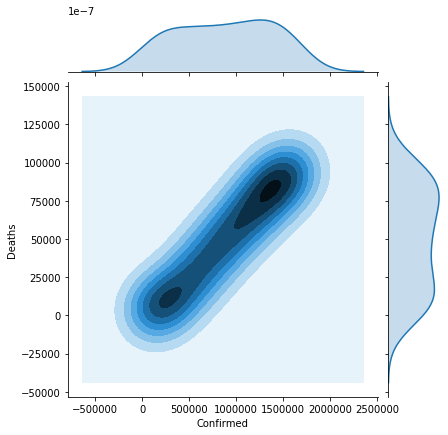

In [11]:
sns.jointplot(x=thousand.Confirmed,y=thousand.Deaths,data=US,kind='kde')

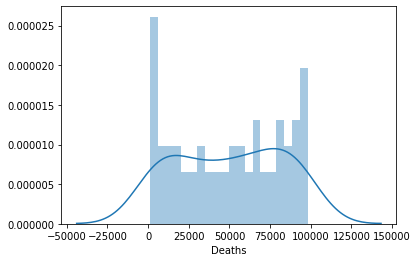

In [18]:
sns.distplot(thousand['Deaths'],bins=20)

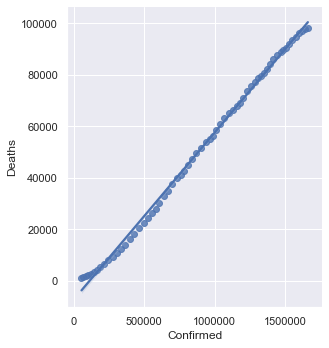

In [29]:
sns.lmplot(x='Confirmed',y='Deaths',data=thousand)
sns.set()

Training Linear Regression Machine Learning Algorithm

In [31]:
thousand.columns

Index(['Province/State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [38]:
X = thousand[['Confirmed','Recovered']]

In [39]:
y = thousand['Deaths']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [41]:
lm = LinearRegression()

In [42]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(lm.intercept_)

-6699.982198013517


In [44]:
lm.coef_

array([0.06276357, 0.00944122])

In [46]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Confirmed,0.062764
Recovered,0.009441


In [48]:
predictions = lm.predict(X_test)

In [49]:
predictions

array([33751.79863658, 22619.97426199, -1431.70634727, 37791.14202641,
       98551.47088224, 89184.70349774, 31890.49534482, 91970.6107455 ,
       93478.51119471, 43233.96465977, 48609.4411921 , -2563.96963002,
       39892.14779916, 69151.77027011, 54926.22624489, 59708.15968569,
       57947.85290554, 82865.13352746, 74036.64235005, 26657.58535137,
       53129.5430271 , 18430.21743696, 97086.23527669, 41589.64413657,
       30152.57406012, 61874.32974404])

Histogram Residuals Normally Distributed

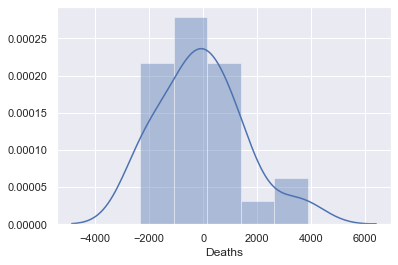

In [52]:
sns.distplot((y_test-predictions))

Text(0, 0.5, 'Predicted Values')

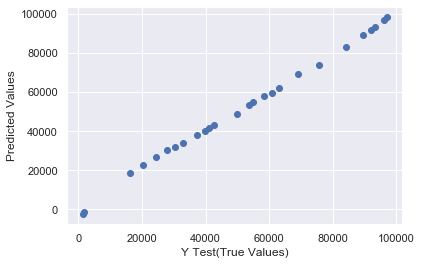

In [58]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')